In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Ejercicio de clasificación

Tenemos el dataset de incumplimiento de clientes para una compañía de tarjetas de crédito. De cada cliente se tiene 
* el balance que le llegó de la tarjeta, 
* si es un estudiante universitario o no 
* el sueldo anual. 
Además contamos si el cliente incumplió el pago o no. 

In [3]:
default_df = pd.read_csv("https://raw.githubusercontent.com/Vic-bit/aprMaqI_CEIA/main/clase3/jupyter_notebooks/datasets/Default.csv")

Como siempre, vemos un poco nuestros datos

In [4]:
default_df.head()
#income son los ingresos mensuales

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [5]:
default_df.info() #no tenemos nada que limpiar

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [6]:
default_df.describe() #estamos trabajando en ordenes de magnitud distintos, se van a tener que nomalizar

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


Convirtamos a las columnas **default** y **student** en columnas numericas

In [7]:
#Como son No y Yes, le tenemos que poner 0 o 1
default_df["Incumplimiento"] = default_df["default"].apply(lambda x: "Si" if x == "Yes" else "No")
default_df["Estudiante"] = default_df["student"].apply(lambda x: "Si" if x == "Yes" else "No")

default_df["default"] = default_df["default"].apply(lambda x: 1 if x == "Yes" else 0)
default_df["student"] = default_df["student"].apply(lambda x: 1 if x == "Yes" else 0)

In [60]:
default_df.head()

,default,student,balance,income,Incumplimiento,Estudiante,balance_bin
0,0,0,729.526495,44361.625074,No,No,746.5285
1,0,1,817.180407,12106.134700,No,Si,746.5285
2,0,0,1073.549164,31767.138947,No,No,1078.3185
3,0,0,529.250605,35704.493935,No,No,580.6330
4,0,0,785.655883,38463.495879,No,No,746.5285


In [8]:
default_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   default         10000 non-null  int64  
 1   student         10000 non-null  int64  
 2   balance         10000 non-null  float64
 3   income          10000 non-null  float64
 4   Incumplimiento  10000 non-null  object 
 5   Estudiante      10000 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 468.9+ KB


Veamos la clases (default):

In [9]:
default_df.default.value_counts()
#Los que incumpleron son 333. Hay un gran desbalance entre las clases. 

default
0    9667
1     333
Name: count, dtype: int64

Observese que tenemos una gran desproporsión de clases. Tenemos 3.3% de observaciónes de personas que no pagaron. 

Obtengamos algunas visualizaciones de los datos

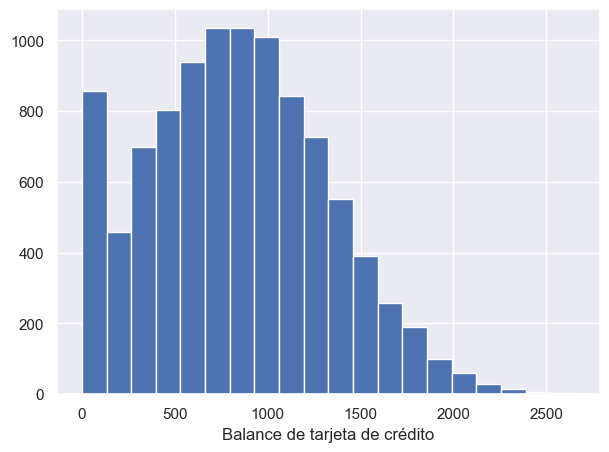

In [10]:
plt.figure(figsize=(7, 5))
default_df["balance"].hist(bins=20)
plt.xlabel("Balance de tarjeta de crédito")
plt.show()
#Hay un gran grupo de clientes que lo usa poco, luego es una distribucion que tiene a ser una normal

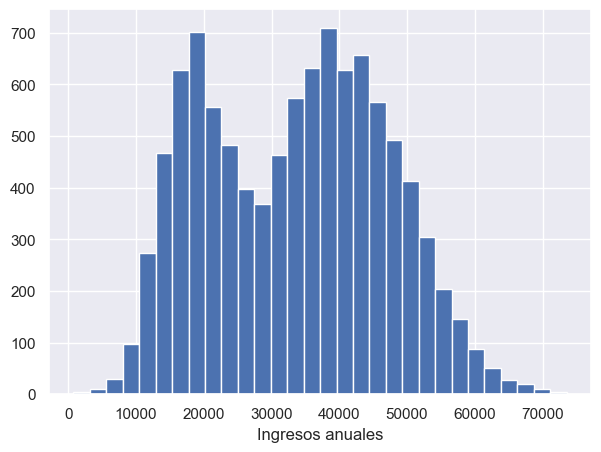

In [11]:
plt.figure(figsize=(7, 5))
default_df["income"].hist(bins=30)
plt.xlabel("Ingresos anuales")
plt.show()
#Hay un grupo de clientes que tiene un sueldo bajo y otro alto

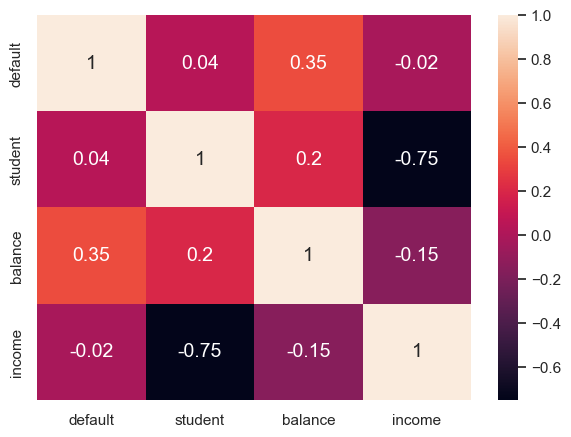

In [12]:
# Veamos la correlacion cruzada
plt.figure(figsize=(7, 5))
default_profit = default_df.corr(numeric_only=True).round(2)
sns.heatmap(data=default_profit, annot=True, annot_kws={"size": 14});
#Si hay mucha dependencia me puede bajar la performance del proyecto. Lo negro es lo más alto que se ve
#pero como es 0.75 y no 0.9, lo dejamos

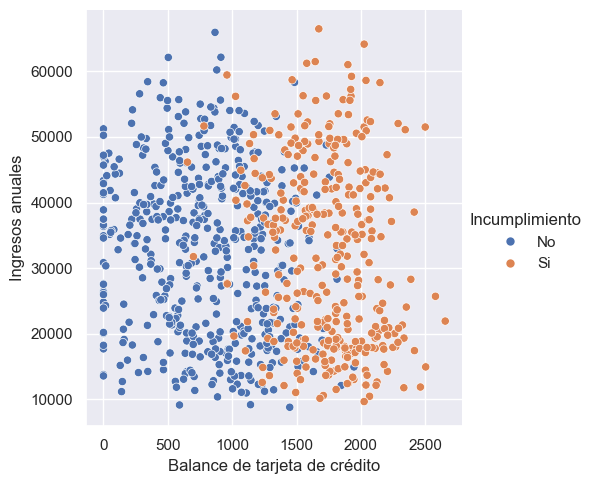

In [13]:
#Hacemos esto para poder graficar y poder visualizar mejor
df_sample_no_default = default_df[default_df["default"] == 0].copy()
df_sample_no_default = df_sample_no_default.sample(frac=0.05)
df_sample_default = default_df[default_df["default"] == 1].copy()

g = sns.relplot(data=pd.concat([df_sample_no_default, df_sample_default]), x="balance", y="income", hue="Incumplimiento", 
                kind="scatter", legend=True)
plt.xlabel("Balance de tarjeta de crédito")
plt.ylabel("Ingresos anuales");
#Es para ver como están distribuido los puntos. Se que que no depende del ingreso anual que no hayan pagado

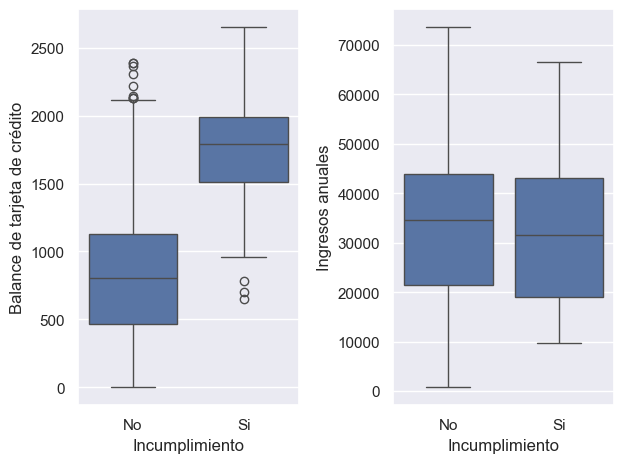

In [14]:
f, ax = plt.subplots(1,2)
sns.boxplot(data=default_df, y="balance", x="Incumplimiento", ax=ax[0])
sns.boxplot(data=default_df, y="income", x="Incumplimiento", ax=ax[1])
ax[0].set_ylabel("Balance de tarjeta de crédito")
ax[1].set_ylabel("Ingresos anuales")
plt.tight_layout();
# 

Veamos un poco la variable de si la persona es estudiante.

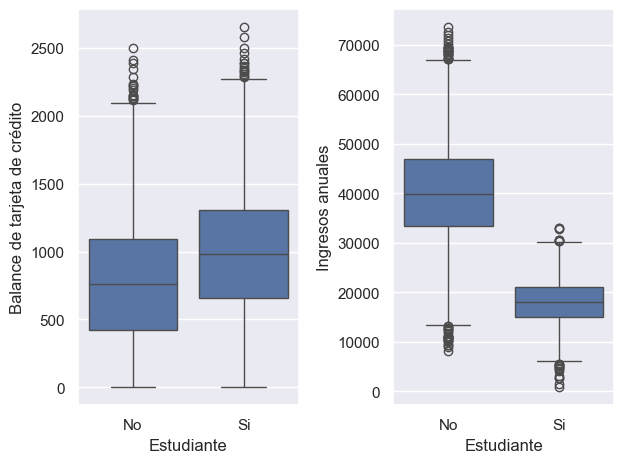

In [15]:
f, ax = plt.subplots(1,2)
sns.boxplot(data=default_df, y="balance", x="Estudiante", ax=ax[0])
sns.boxplot(data=default_df, y="income", x="Estudiante", ax=ax[1])
ax[0].set_ylabel("Balance de tarjeta de crédito")
ax[1].set_ylabel("Ingresos anuales")
plt.tight_layout();
#Cuando es estudiante suele tener un balance más altos porque tienen menos ingresos, un poco de inconsciencia

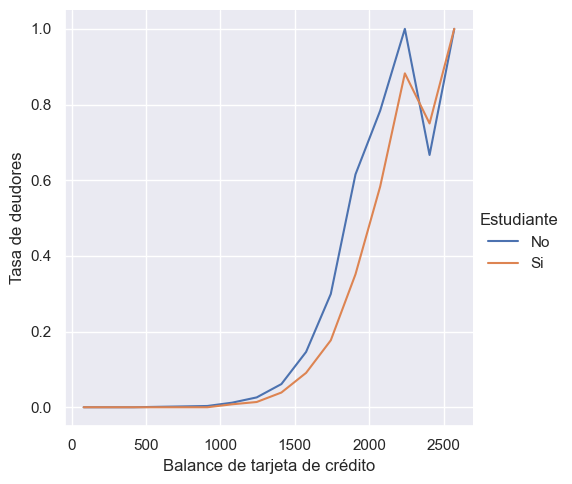

In [16]:
#Obtengamos la tasa de deudores versus si son estudiantes o no
default_df["balance_bin"] = pd.cut(default_df['balance'],16).apply(lambda x: x.mid)

df_grouped = default_df.groupby(["balance_bin", "student"], as_index=False, observed=True).agg({
    "default": ["sum", "count"] 
})
df_grouped.columns = ["balance", "Estudiante", "sum", "count"]
df_grouped["default_rate"] = df_grouped["sum"] / df_grouped["count"]

df_grouped["Estudiante"] = df_grouped["Estudiante"].apply(lambda x: "Si" if x == 1 else "No")

g = sns.relplot(data=df_grouped, x="balance", y="default_rate", hue="Estudiante", 
                kind="line", legend=True)
plt.xlabel("Balance de tarjeta de crédito")
plt.ylabel("Tasa de deudores");

#Los estudiantes son menos deudores.

Vemos que los estudiantes, dado un balance, tienden más a pagar la tarjeta de crédito que los no estudiantes.

---
### Primer modelo de regresión logistica

Podemos ver que la variable balance de tarjeta es la mejor candidata para clasificar si la persona va a pagar o no. Por lo que armemos un modelo de regresión logistica simple usando balance.

In [59]:
# como siempre vamos separando nuestras variables predictoras de la variable a predecir
X = default_df.loc[:, ["balance"]].values
y = default_df.loc[:, "default"].values
print(X.shape)
print(y.shape)

(10000, 1)
(10000,)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

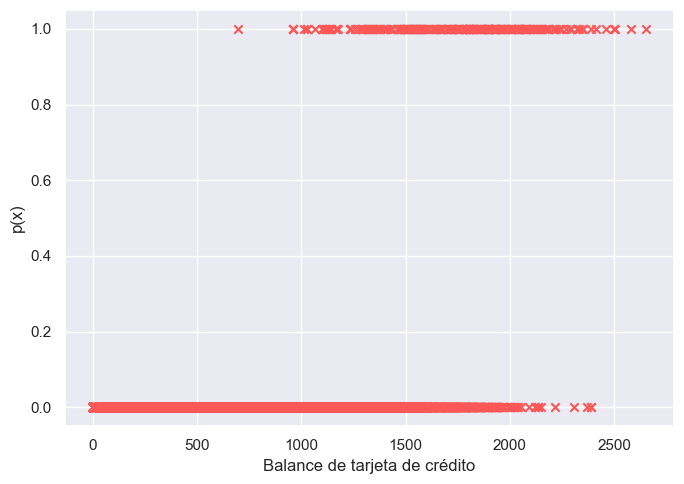

In [19]:
plt.figure(figsize=(7, 5))
plt.scatter(X_train, y_train, marker="x", color="#fb5757")
plt.xlabel("Balance de tarjeta de crédito")
plt.ylabel("p(x)")
plt.tight_layout()
plt.show()
#Están muy solapados los datos.

Ya con los datos de entrenamiento, vamos a entrenar el modelo de regresión logistica de [sckit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
# Entrenamos el modelo por máxima verosimilitud
classifier_balance = LogisticRegression(random_state = 0, class_weight="balanced")
classifier_balance.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

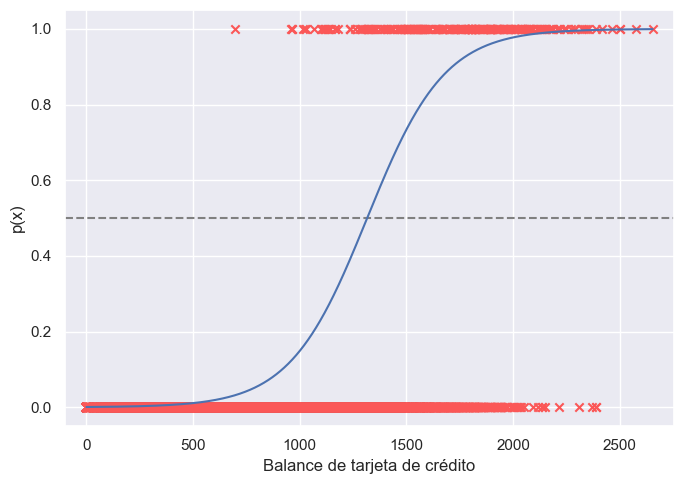

In [22]:
#Obtengamos la funcion logistica
xx = np.linspace(np.min(X_train), np.max(X_train), 1000) #tomamos 1000 puntos entre esos dos valores y vamos a crear una nueva varaible de entrada
# Usando el metodo que nos da las probabilidades
yy = classifier_balance.predict_proba(xx.reshape([-1, 1]))

plt.figure(figsize=(7, 5))
plt.plot([-1000, 100000], [0.5, 0.5], linestyle="--", color="gray")
plt.scatter(X_train, y_train, marker="x", color="#fb5757")
plt.plot(xx, yy[:, 1])
plt.xlabel("Balance de tarjeta de crédito")
plt.ylabel("p(x)")
plt.xlim([np.min(X_train)-100, np.max(X_train)+100])
plt.tight_layout()
plt.show()
#Lo hacemos apra saber si cummpliria o no para esos datos ficticios
#Quiero que me diga que paga o no, no que me de una probabilidad
#0,5 para arriba cumple, y para abajo no

----

Vimos que estudiante se veia buen candidato para predecir si la persona iba a pagar o no

In [23]:
X = default_df.loc[:, ["student"]].values
y = default_df.loc[:, "default"].values
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Entrenamos el modelo por máxima verosimilitud
classifier_student = LogisticRegression(random_state = 0, class_weight="balanced")
classifier_student.fit(X_train_student, y_train_student)
#El análisis que hicimos con el balance y la salida, lo hacemos con el estudiante
#no necesitamos los 1000 puntos, porque hay dos valores de entrada 1 o 0.


LogisticRegression(class_weight='balanced', random_state=0)

Dado que estudiante es una variable booleana, podemos ver que probabilidad predice el modelo:

In [24]:
classifier_student.predict_proba([[1], [0]])[:, -1]
#La probabilida de que no pague es caso del 60%
#El no tener en cuenta todas las variables produce errores, es lo que se llama
#factor de confusión, la salida tiene informacion de las otras variables de 
#entrada y si no las tiene en cuenta vamos a estar cometiendo un error
#En un clasificado siempre va a ser importante elegir las varaibles de entrada y no descartar 
#Sino vamos a tener sesgo. 

array([0.58295302, 0.45585965])

Vemos que si la persona es estudiante, el modelo le da más probabildad de que no pague... pero habiamos visto que era al revez. **Qué está pasando?**

Aunque un estudiante individual con un saldo de tarjeta de crédito determinado tenderá a tener una menor probabilidad de incumplimiento que un no estudiante con el mismo saldo de tarjeta de crédito, el hecho de que los estudiantes en general tiendan a tener saldos de tarjeta de crédito más altos significa que en general, los estudiantes tienden a incumplir sus obligaciones a un ritmo mayor que los no estudiantes. 

Esta es una distinción importante para una compañía de tarjetas de crédito que está tratando de determinar a quién debe ofrecer crédito. Un estudiante es mas riesgoso sin no tenemos datos de balances. Sin embargo, es menos riesgoso que un no estudiante ante un mismo nivel de balance. 

Este sencillo ejemplo ilustra los peligros con la realización de regresiones que involucran un solo predictor cuando otros predictores también pueden ser relevantes.

Este fenomeno es el que llamamos [factor de confusión](https://es.wikipedia.org/wiki/Factor_de_confusi%C3%B3n).

---
### Modelo de regresión logistica multiple

Intentemos ahora ver ahora un modelo de regresión logistica con todas las entradas del dataset.

Pero antes de entrenar el modelo, veamos que balance esta entre 0 y 2600, e income entre 700 y 73000, es decir income tiene una variabilidad mucho mayor. Lo que queremos hacer es normalizar los features, para que evitemos que por cuestiones simplemente de unidades, una feature tenga mas relevancia que otra. 

In [25]:
default_df.describe()

,default,student,balance,income
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.033300,0.294400,835.374886,33516.981876
std,0.179428,0.455795,483.714985,13336.639563
min,0.000000,0.000000,0.000000,771.967729
25%,0.000000,0.000000,481.731105,21340.462903
50%,0.000000,0.000000,823.636973,34552.644802
75%,0.000000,1.000000,1166.308386,43807.729272
max,1.000000,1.000000,2654.322576,73554.233495


In [26]:
X = default_df.loc[:, ["balance", "income", "student"]].values
y = default_df.loc[:, "default"].values
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

In [27]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_train_total = sc_X.fit_transform(X_train_total) 
X_test_total = sc_X.transform(X_test_total)

In [28]:
# Entrenamos el modelo por máxima verosimilitud
classifier_total = LogisticRegression(random_state = 0, class_weight="balanced")
classifier_total.fit(X_train_total, y_train_total)

LogisticRegression(class_weight='balanced', random_state=0)

## Metricas de evaluación

Empecemos por la métrica más básica, el [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score):

In [29]:
# Empecemos por la metrica mas basica, el accuracy:
print(f"Porcentaje de muestras bien clasificadas: {(classifier_balance.score(X_test, y_test)*100)}%")
print(f"Porcentaje de muestras bien clasificadas usando todos los atributos: {(classifier_total.score(X_test_total, y_test_total)*100)}%")

Porcentaje de muestras bien clasificadas: 87.0%
Porcentaje de muestras bien clasificadas usando todos los atributos: 86.83999999999999%


A simple vista los dos modelos son excelentes, pero usemos un modelo de baseline que siempre diga que todos los clientes pagarán la tarjeta:

In [30]:
from sklearn.metrics import accuracy_score
prediccion_naive = np.zeros_like(y_test) 

print(f"Porcentaje de muestras bien clasificadas por el modelo naive: {accuracy_score(y_test, prediccion_naive)*100}%")

Porcentaje de muestras bien clasificadas por el modelo naive: 96.67999999999999%


Que paso? Por que el modelo naive es tan bueno? 

Sencillo, recordemos que en el dataset habia aprox. 9600 datos con el target igual a cero, o sea que pagaron, y 300 con el target igual a 1, es decir que no pagaron. 

Es decir, tenemos un gran desbalance de clases, en donde la positiva es mucho mas chica que la negativa. Usemos otras metricas si podemos ver como es el resultado.

Empecemos por la [matriz de confusión](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#confusion-matrix):

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = classifier_balance.predict(X_test)
y_pred_total_test = classifier_total.predict(X_test_total)

In [32]:
cm_balanced = confusion_matrix(y_test, y_pred_test)
cm_total = confusion_matrix(y_test_total, y_pred_total_test)
cm_naive = confusion_matrix(y_test, prediccion_naive)

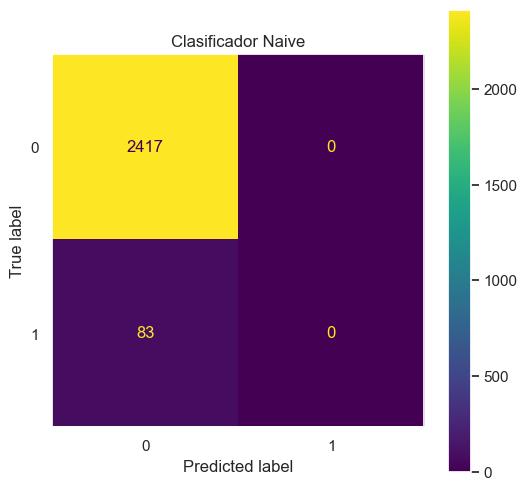

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive,
                              display_labels=classifier_balance.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive");

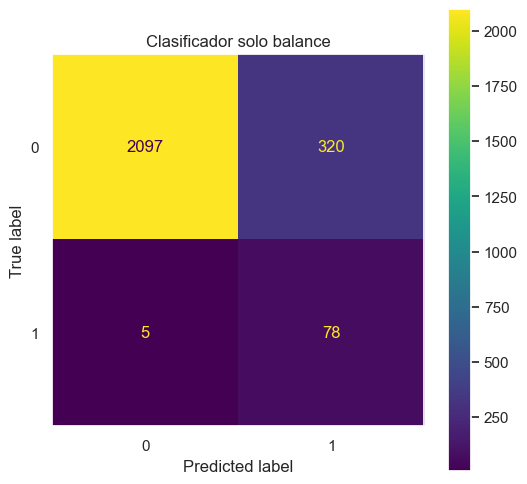

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_balanced,
                              display_labels=classifier_balance.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador solo balance");

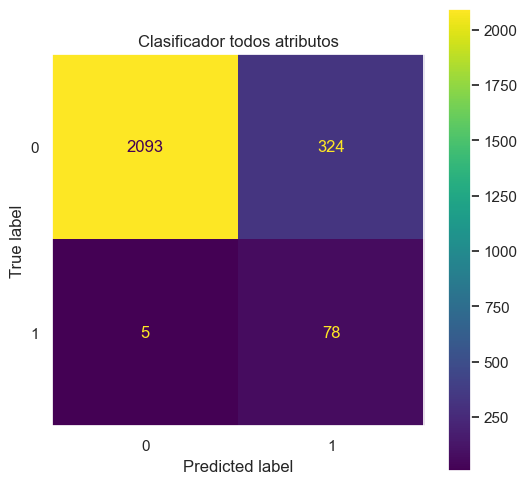

In [35]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_total,
                              display_labels=classifier_total.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador todos atributos");

In [36]:
# Midamos la sensibilidad y especificidad
print("Modelo Naive")
P = np.sum(cm_naive[1, :])
N = np.sum(cm_naive[0, :])
TP = cm_naive[1, 1]
TN = cm_naive[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")

print("\n")
print("Modelo 1 solo atributo")
P = np.sum(cm_balanced[1, :])
N = np.sum(cm_balanced[0, :])
TP = cm_balanced[1, 1]
TN = cm_balanced[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")

print("\n")
print("Modelo todos los atributos")
P = np.sum(cm_total[1, :])
N = np.sum(cm_total[0, :])
TP = cm_total[1, 1]
TN = cm_total[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")


Modelo Naive
Sensibilidad: 0.0
Especificidad: 1.0


Modelo 1 solo atributo
Sensibilidad: 0.9397590361445783
Especificidad: 0.8676044683491932


Modelo todos los atributos
Sensibilidad: 0.9397590361445783
Especificidad: 0.8659495242035581


Midamos la exactitud balanceada

In [37]:
print("Modelo Naive")
P = np.sum(cm_naive[1, :])
N = np.sum(cm_naive[0, :])
TP = cm_naive[1, 1]
TN = cm_naive[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Exactitud balanceada: {(TPR + TNR)/2}")

print("\n")
print("Modelo 1 solo atributo")
P = np.sum(cm_balanced[1, :])
N = np.sum(cm_balanced[0, :])
TP = cm_balanced[1, 1]
TN = cm_balanced[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Exactitud balanceada: {(TPR + TNR)/2}")

print("\n")
print("Modelo todos los atributos")
P = np.sum(cm_total[1, :])
N = np.sum(cm_total[0, :])
TP = cm_total[1, 1]
TN = cm_total[0, 0]
TPR = TP/P
TNR = TN/N
print(f"Exactitud balanceada: {(TPR + TNR)/2}")

Modelo Naive
Exactitud balanceada: 0.5


Modelo 1 solo atributo
Exactitud balanceada: 0.9036817522468858


Modelo todos los atributos
Exactitud balanceada: 0.9028542801740682


Midamos ahora la precisión y especificidad

In [38]:
from sklearn.metrics import precision_score, recall_score

print("Modelo Naive")
print(f"Precision: {precision_score(y_test, prediccion_naive, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, prediccion_naive, zero_division=0)}")

print("\n")
print("Modelo 1 solo atributo")
print(f"Precision: {precision_score(y_test, y_pred_test, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test, y_pred_test, zero_division=0)}")

print("\n")
print("Modelo todos los atributos")
print(f"Precision: {precision_score(y_test_total, y_pred_total_test, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_total, y_pred_total_test, zero_division=0)}")

Modelo Naive
Precision: 0.0
Recuperación: 0.0


Modelo 1 solo atributo
Precision: 0.19597989949748743
Recuperación: 0.9397590361445783


Modelo todos los atributos
Precision: 0.19402985074626866
Recuperación: 0.9397590361445783


In [39]:
from sklearn.metrics import f1_score, fbeta_score

print("Modelo Naive")
print(f"F1-score: {f1_score(y_test, prediccion_naive, zero_division=0)}")
print(f"F2-score: {fbeta_score(y_test, prediccion_naive, zero_division=0, beta=2)}")
print(f"F0.5-score: {fbeta_score(y_test, prediccion_naive, zero_division=0, beta=0.5)}")

print("\n")
print("Modelo 1 solo atributo")
print(f"F1-score: {f1_score(y_test, y_pred_test, zero_division=0)}")
print(f"F2-score: {fbeta_score(y_test, y_pred_test, zero_division=0, beta=2)}")
print(f"F0.5-score: {fbeta_score(y_test, y_pred_test, zero_division=0, beta=0.5)}")

print("\n")
print("Modelo todos los atributos")
print(f"F1-score: {f1_score(y_test_total, y_pred_total_test, zero_division=0)}")
print(f"F2-score: {fbeta_score(y_test_total, y_pred_total_test, zero_division=0, beta=2)}")
print(f"F0.5-score: {fbeta_score(y_test_total, y_pred_total_test, zero_division=0, beta=0.5)}")

Modelo Naive
F1-score: 0.0
F2-score: 0.0
F0.5-score: 0.0


Modelo 1 solo atributo
F1-score: 0.32432432432432434
F2-score: 0.5342465753424658
F0.5-score: 0.23283582089552238


Modelo todos los atributos
F1-score: 0.3216494845360825
F2-score: 0.5313351498637602
F0.5-score: 0.2306327616794796


#### Curva ROC

Para podes crear la curva ROC debemos usar la probabilidad del modelo

In [40]:
# predict_proba() Nos permite obtener la probabilidad. Como tenemos dos clases, nos devuelve la probabilidad de las dos clases
# Nos quedamos con la clase 1 (que es la que nos importa)
prob_balance = classifier_balance.predict_proba(X_test)[:, -1]
prob_total = classifier_total.predict_proba(X_test_total)[:, -1]
prob_naive = np.zeros_like(prob_total)

Sckikit-learn tambien nos provee de estas metricas, tanto para crear la [curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) como calcular el [AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html#sklearn.metrics.auc):

In [41]:
from sklearn.metrics import auc, roc_curve

fpr_naive, tpr_naive, _ = roc_curve(y_test, prob_naive) 
fpr_balance, tpr_balance, _ = roc_curve(y_test, prob_balance)
fpr_total, tpr_total, _ = roc_curve(y_test_total, prob_total)
#Calcula todos los umbrales

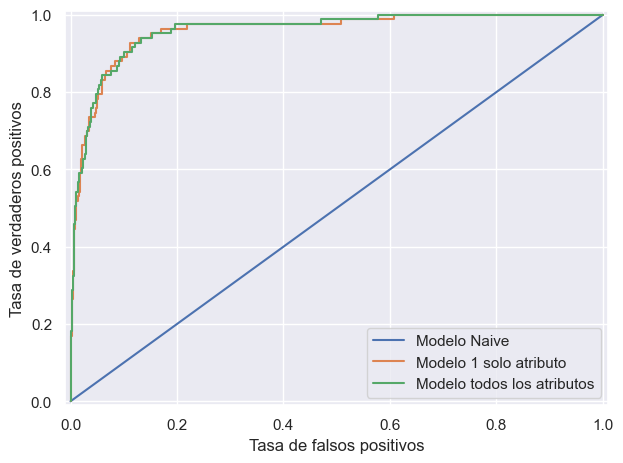

In [42]:
plt.plot(fpr_naive, tpr_naive, label="Modelo Naive") #Modelo ficticio
plt.plot(fpr_balance, tpr_balance, label="Modelo 1 solo atributo")
plt.plot(fpr_total, tpr_total, label="Modelo todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();


In [43]:
#fpr_naive, tpr_naive, _ = roc_curve(y_test, prob_naive)
#fpr_balance, tpr_balance, _ = roc_curve(y_test, prob_balance)
#fpr_total, tpr_total, _ = roc_curve(y_test_total, prob_total)
#Lo podemos eliminar

In [44]:
print("AUC")
print(f"Modelo Naive AUC: {auc(fpr_naive, tpr_naive)}")
print(f"Modelo 1 solo atributo AUC: {auc(fpr_balance, tpr_balance)}")
print(f"Modelo todos los atributos AUC: {auc(fpr_total, tpr_total)}")
#Es postivio que estén cerca de 1.

AUC
Modelo Naive AUC: 0.5
Modelo 1 solo atributo AUC: 0.9578138786008743
Modelo todos los atributos AUC: 0.958586518186939


In [45]:
# Busquemos el threshold para el modelo con todos los atributos
fpr_total, tpr_total, thr_total = roc_curve(y_test_total, prob_total)
#Ahora sí queremos la tercera salida de la función 
#Tenemos FP, TP, umbral

In [46]:
value_tpr = np.max(tpr_total[fpr_total < 0.1]) #Seleccionamos el umbral
threshold_selected = thr_total[(tpr_total == value_tpr) & (fpr_total < 0.1)]

# Clasifiquemos con este nuevo valor
prob_total = classifier_total.predict_proba(X_test_total)[:, -1] #Si es mayor que el umbral le ponemos 1, sino 0
y_pred_total_new = (prob_total >= threshold_selected).astype(float)


print("Knn con todos los atributos")
print(f"Precision: {precision_score(y_test_total, y_pred_total_new, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_total, y_pred_total_new, zero_division=0)}")
print(f"F1-score: {f1_score(y_test_total, y_pred_total_new, zero_division=0)}")

cm_total = confusion_matrix(y_test_total, y_pred_total_new)
P = np.sum(cm_total[1, :])
N = np.sum(cm_total[0, :])
TP = cm_total[1, 1]
TN = cm_total[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")

Knn con todos los atributos
Precision: 0.24666666666666667
Recuperación: 0.891566265060241
F1-score: 0.3864229765013055
Sensibilidad: 0.891566265060241
Especificidad: 0.9064956557716177


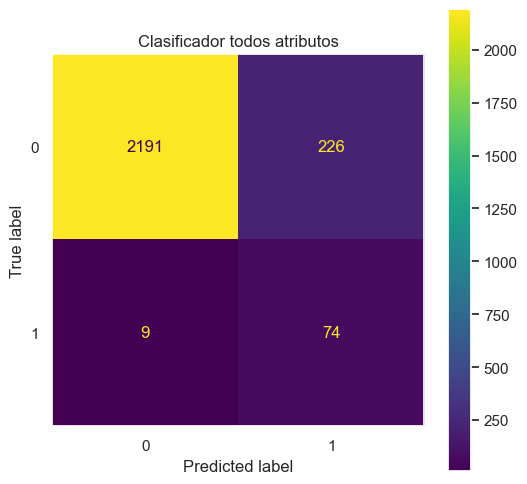

In [47]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_total,
                              display_labels=classifier_total.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador todos atributos");
#Calculamos la matriz de confusion, subimos los TP

### Gráfico de la frontera de decisión

Si tenemos un modelo con dos atributos, podemos graficar la frontera de decisión

In [48]:
X = default_df.loc[:, ["balance", "income"]].values #Entrenamos un modelo solo con balance e ingreso
y = default_df.loc[:, "default"].values
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Normalizamos
sc_X = StandardScaler()
X_train_two = sc_X.fit_transform(X_train_two)  

# Entrenamos el modelo por máxima verosimilitud
classifier_two = LogisticRegression(random_state = 0, class_weight="balanced")
classifier_two.fit(X_train_two, y_train_two)
#Hacemos la regresión logística

LogisticRegression(class_weight='balanced', random_state=0)

In [49]:
# Crear la malla de puntos para el gráfico
X_set, y_set = X_test_two, y_test_two
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=1),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=1)
)

X_cont = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1052/2700067857.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


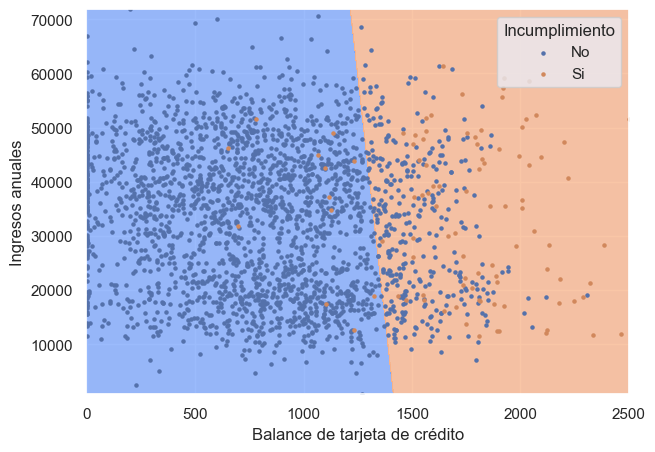

In [50]:
from matplotlib.colors import ListedColormap

# Crear el gráfico de contorno
plt.figure(figsize=(7, 5))
plt.contourf(
    X1, X2, classifier_two.predict(X_cont).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('#7aa5fb', '#f8b389'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
lab = ["No", "Si"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('#5471ab', '#d1885c'))(i), label=lab[i],
        s=5
    )

plt.xlabel('Balance de tarjeta de crédito') 
plt.ylabel('Ingresos anuales') 
plt.legend(title="Incumplimiento")

plt.show()
#Pintamos la línea que nos separa en el umbral en el que el modelo deja de decir
#que la combinación de variable no incumple y diga que sí incumple
#Vemos hay que muchos puntos azules, y muchos de ellos estan en la parte naranja, y tenemos muchos FP, 
#No tantos FN porque hay pocos naranja del lado izquierdo

## Clasificador KNN

Vamos a usar el clasificador KNN de [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Para este ejemplo, vamos a usar el mismo dataset de la regresión logistica.

In [51]:
X = default_df.loc[:, ["balance", "income", "student"]].values
y = default_df.loc[:, "default"].values
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

sc_X = StandardScaler()
X_train_total = sc_X.fit_transform(X_train_total)
X_test_total = sc_X.transform(X_test_total)
#Normalizamos

In [52]:
# Entrenamos
from sklearn.neighbors import KNeighborsClassifier

classifier_knn_total = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
classifier_knn_total.fit(X_train_total, y_train_total)
#p=2 distncia euclediana

KNeighborsClassifier(n_neighbors=23)

In [53]:
#Evaluamos
y_pred_total  = classifier_knn_total.predict(X_test_total)

cm_knn_total = confusion_matrix(y_test_total, y_pred_total)

In [54]:
print("Knn con todos los atributos")
print(f"Precision: {precision_score(y_test_total, y_pred_total, zero_division=0)}")
print(f"Recuperación: {recall_score(y_test_total, y_pred_total, zero_division=0)}")
print(f"F1-score: {f1_score(y_test_total, y_pred_total, zero_division=0)}")

cm_total = confusion_matrix(y_test_total, y_pred_total)
P = np.sum(cm_total[1, :])
N = np.sum(cm_total[0, :])
TP = cm_total[1, 1]
TN = cm_total[0, 0]
print(f"Sensibilidad: {TP/P}")
print(f"Especificidad: {TN/N}")

fpr_knn, tpr_knn, _ = roc_curve(y_test_total, y_pred_total)
print(f"Modelo Naive AUC: {auc(fpr_knn, tpr_knn)}")
#Calculamos las métricas

Knn con todos los atributos
Precision: 0.7297297297297297
Recuperación: 0.3253012048192771
F1-score: 0.45
Sensibilidad: 0.3253012048192771
Especificidad: 0.9958626396359123
Modelo Naive AUC: 0.6605819222275947


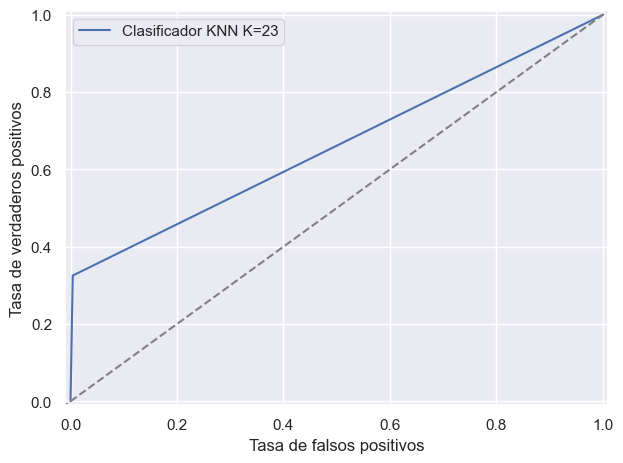

In [55]:
plt.plot(fpr_knn, tpr_knn, label="Clasificador KNN K=23")
plt.plot([-10, 10], [-10, 10], color="gray", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();
#No tenemos umbral, podemos var la TP vs FP, es una curva roc de un
#solo punto. 

Veamos la frontera de decisión

In [56]:
X = default_df.loc[:, ["balance", "income"]].values
y = default_df.loc[:, "default"].values
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

sc_X = StandardScaler()
X_train_two = sc_X.fit_transform(X_train_two)

classifier_knn_two = KNeighborsClassifier(n_neighbors=23, metric="minkowski", p=2)
classifier_knn_two.fit(X_train_two, y_train_two)
#Hacemos la frontera donde decimos que era negativo o postitivo, pero con el modelo de KNN


KNeighborsClassifier(n_neighbors=23)

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1052/3749757271.py:22: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


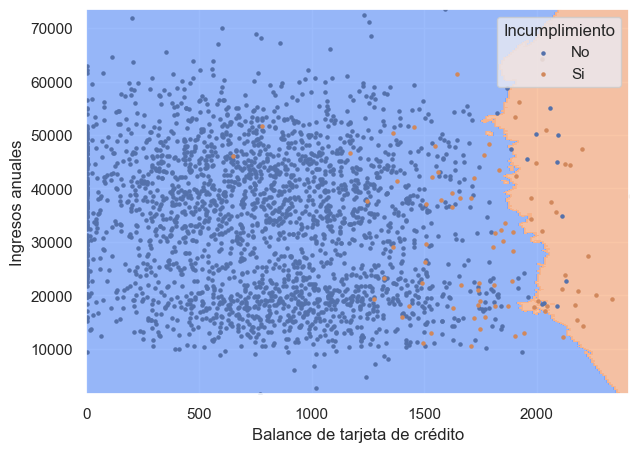

In [57]:
# Crear la malla de puntos para el gráfico
X_set, y_set = X_test_two, y_test_two
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=10),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=10)
)

X_cont = sc_X.transform(np.array([X1.ravel(), X2.ravel()]).T)

# Crear el gráfico de contorno
plt.figure(figsize=(7, 5))
plt.contourf(
    X1, X2, classifier_knn_two.predict(X_cont).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('#7aa5fb', '#f8b389'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Graficar los puntos de entrenamiento
lab = ["No", "Si"]
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        c=ListedColormap(('#5471ab', '#d1885c'))(i), label=lab[i],
        s=5
    )

plt.xlabel('Balance de tarjeta de crédito') 
plt.ylabel('Ingresos anuales') 
plt.legend(title="Incumplimiento")

plt.show()

No es lineal la frontera, nos permite clasificar sin una línea recta. La cantidad de FP disminyó porque casi no hay azules del otro lado. Los FN sigue siendo alta.
Si fuera un banco no me sirve.